Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
1
1 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.cs


In [284]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [285]:
# Importing data
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [286]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# EDA(Exploratory Data Analysis)

In [287]:
# Cheking dimension of the data
df.shape

(1599, 12)

In [288]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [289]:
# Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [290]:
#Checking value counts of each column
def value_counts(data):
     for i in data.columns:
        print(data[i].value_counts())
        print('\n')

value_counts(df)

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [291]:
# Checking citric acid rows where it contains 0.00 value belongs to one particular class or not
df[df['citric acid']==0.00].value_counts(df['quality'])

quality
5    57
6    54
4    10
7     8
3     3
Name: count, dtype: int64

In [292]:
#Replacing citric acid 0.00 value with mean value of the column
df['citric acid']=df['citric acid'].replace(0.00,df['citric acid'].mean())

In [293]:
# Checking again value count of citric acid
df['citric acid'].value_counts()

citric acid
0.270976    132
0.490000     68
0.240000     51
0.020000     50
0.260000     38
           ... 
0.720000      1
0.620000      1
0.750000      1
1.000000      1
0.780000      1
Name: count, Length: 80, dtype: int64

# Statistical Summary

In [294]:
#Description of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.293345,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177148,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.270976,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Graphical Analysis

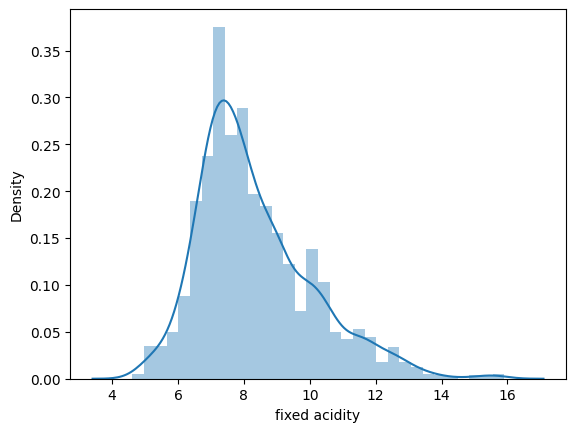

In [295]:
# Distribution of fixed acidity
sns.distplot(df['fixed acidity'])
plt.show()

Distribution looking normal

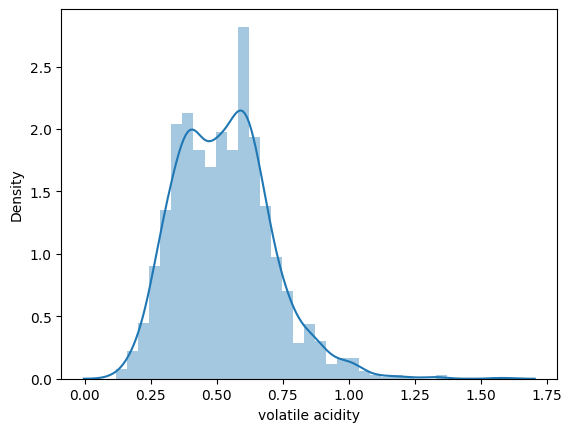

In [296]:
# Distribution of volatile acidity
sns.distplot(df['volatile acidity'])
plt.show()

almost normally distributed

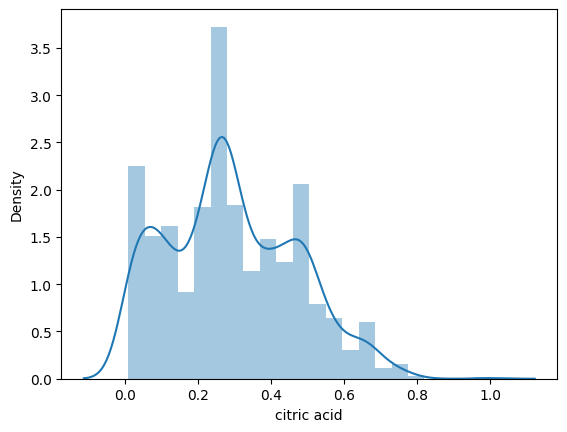

In [297]:
# distribution of citric acid 
sns.distplot(df['citric acid'])
plt.show()

normally distributed

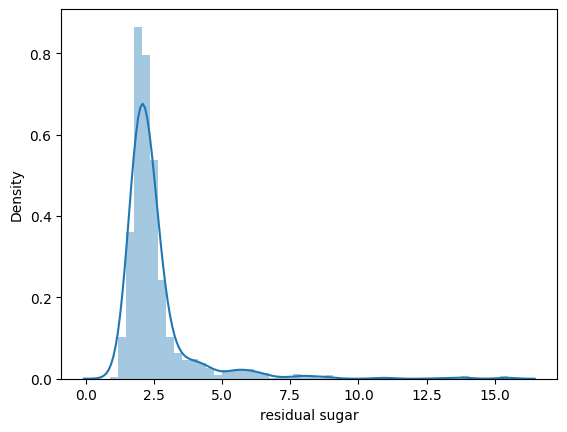

In [298]:
# distribution of residual sugar
sns.distplot(df['residual sugar'])
plt.show()

Right skewed distribution

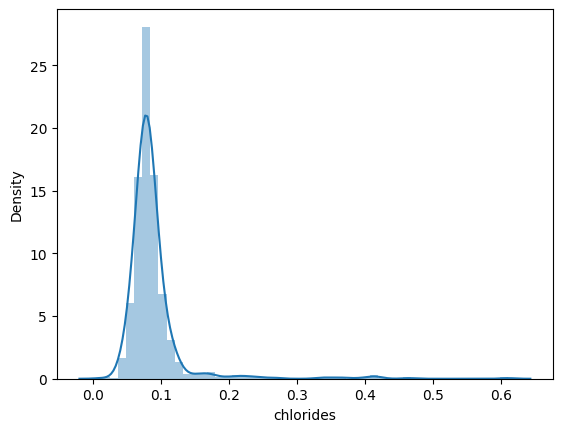

In [299]:
# Distribution of chlorides
sns.distplot(df['chlorides'])
plt.show()

Right skewed distribution

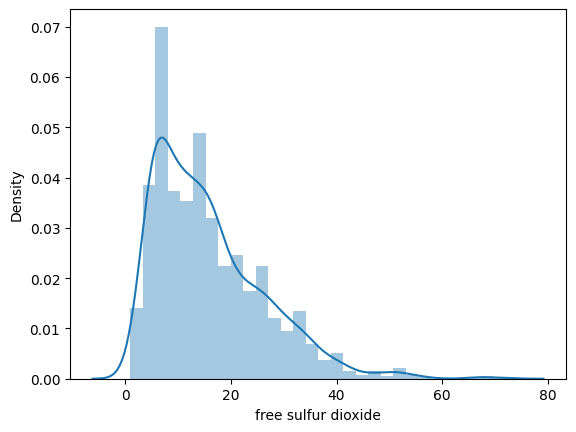

In [300]:
# Distribution of free sulfur dioxide
sns.distplot(df['free sulfur dioxide'])
plt.show()

Right skewed Distribution

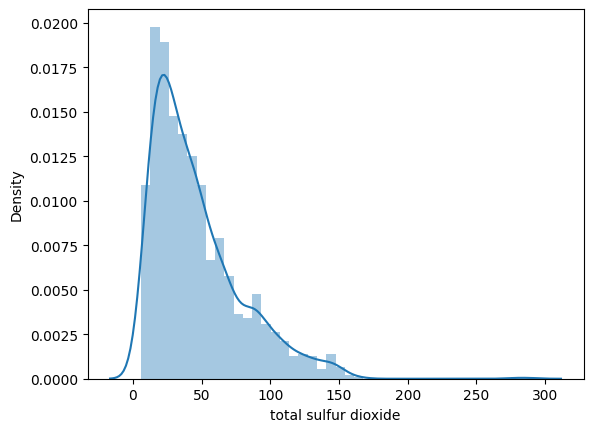

In [301]:
# Distribution of total sulfur dioxide
sns.distplot(df['total sulfur dioxide'])
plt.show()

Conclusion :- Right Skewed distribution

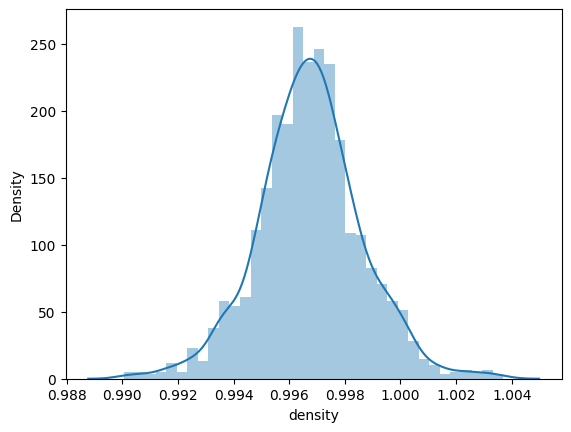

In [302]:
# Distribution of density
sns.distplot(df['density'])
plt.show()

Conclusion :- Normal distribution

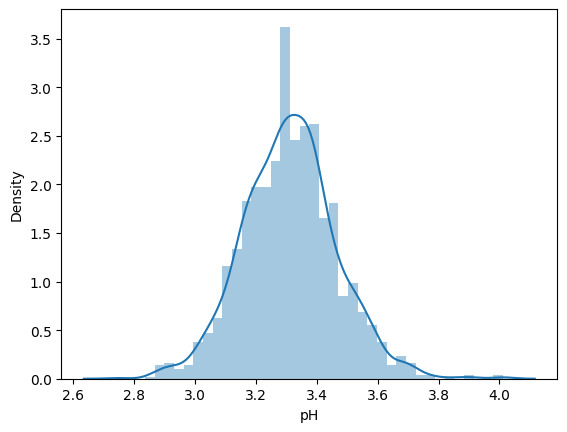

In [303]:
# Distribution of pH
sns.distplot(df['pH'])
plt.show()

Conclusion:- Normal Distribution

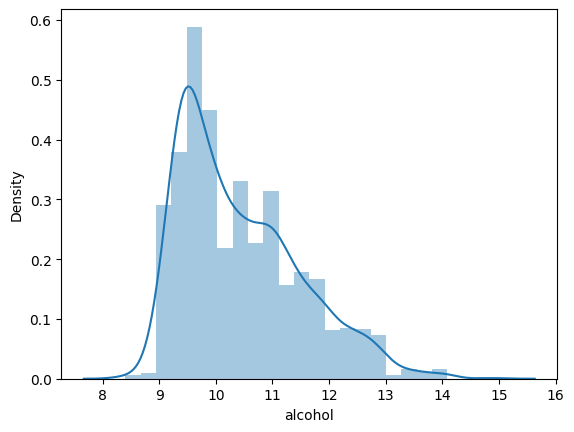

In [304]:
# Distribution of alcohol
sns.distplot(df['alcohol'])
plt.show()

Graph Shows :- Right skewed distribution

Bivariate Analysis

Visualizing relation between each independent feature and target(quality) variable

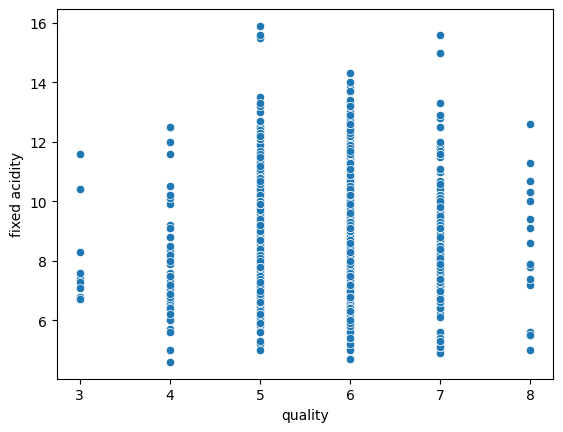

In [305]:
#relation between fixed acidity and quality
sns.scatterplot(x='quality',y='fixed acidity',data=df)
plt.show()

Here we are not seeing any clear trend between the columns.

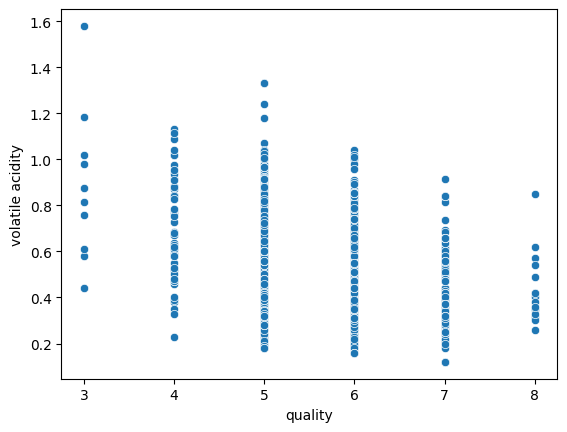

In [306]:
# Relation between volatile acidity and quality
sns.scatterplot(x='quality',y='volatile acidity',data=df)
plt.show()

This Graph is also not showing any clear trend between volatile acid and quality.

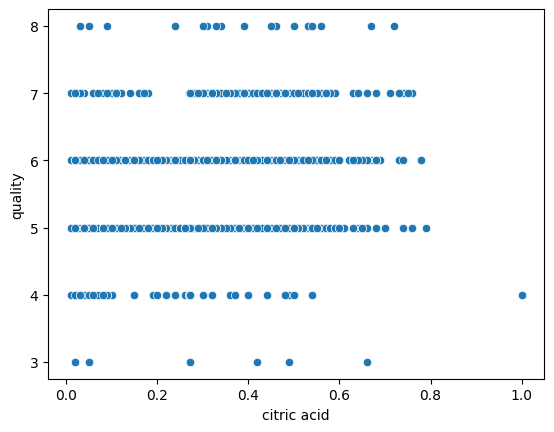

In [307]:
# relation between citric acid and quality
sns.scatterplot(x='citric acid',y='quality',data=df)
plt.show()

No clear trend between citric acid and quality

<Axes: xlabel='residual sugar', ylabel='quality'>

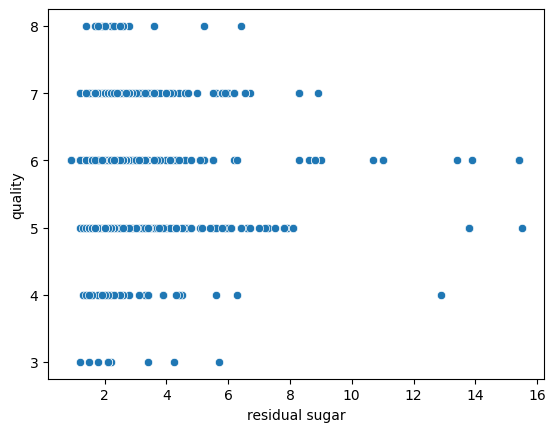

In [308]:
# Relation between residual sugar and quality
sns.scatterplot(x='residual sugar',y='quality',data=df)

Not showing any clear trend between residual sugar and quality

<Axes: xlabel='chlorides', ylabel='quality'>

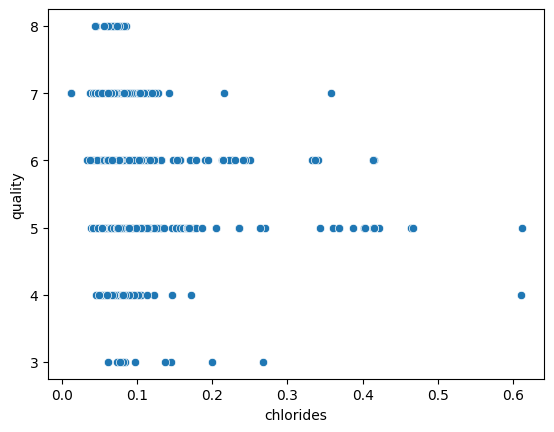

In [309]:
# Checking Relationship between chlorides and quality
sns.scatterplot(x='chlorides',y='quality',data=df)

showing very weak relation between chlorides and quality

<Axes: xlabel='free sulfur dioxide', ylabel='quality'>

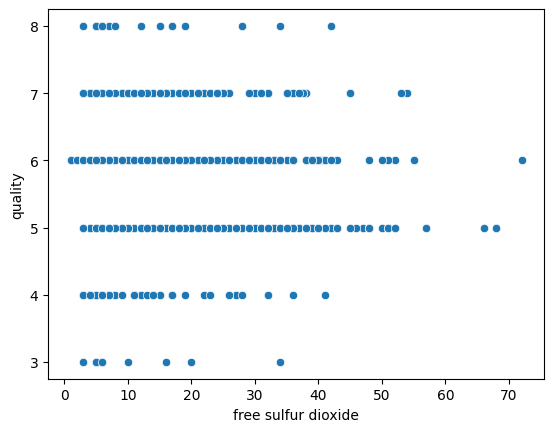

In [310]:
# Checking Relationship Between Free sulfur dioxide and quality
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)

not showing any clear relation between free sulfur dioxide and quality. which means either weak correlation or no relation.

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

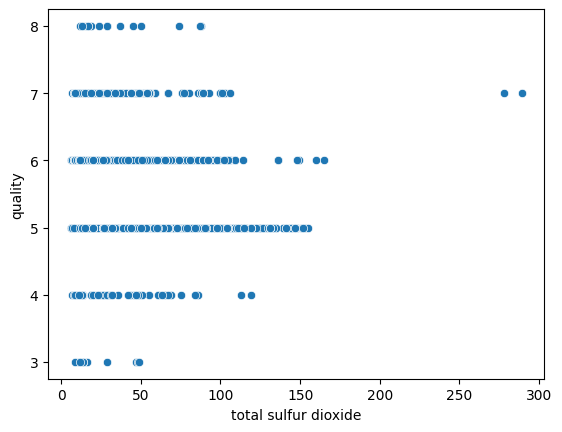

In [311]:
# Relationship between total sulfur dioxide and quality
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)

 looking very weak relation between them. 

<Axes: xlabel='density', ylabel='quality'>

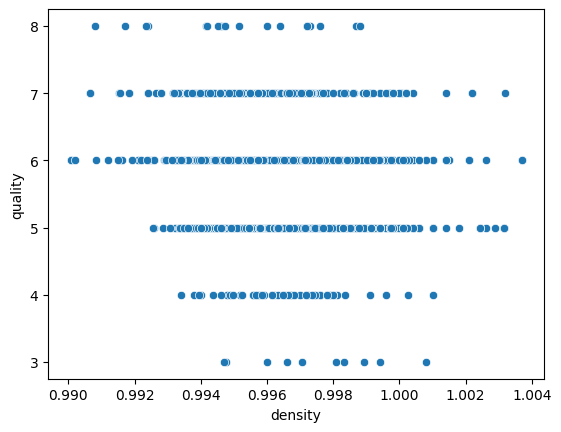

In [312]:
# Relationship between density and quality
sns.scatterplot(x='density',y='quality',data=df)

not showing any clear relationship between them

<Axes: xlabel='pH', ylabel='quality'>

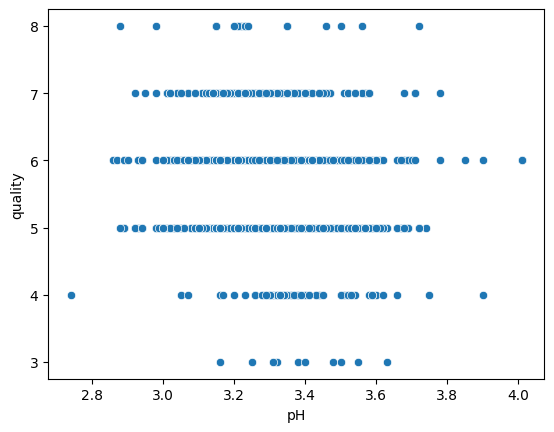

In [313]:
# Relationshop between pH and quality 

sns.scatterplot(x='pH',y='quality',data=df)

showing same relation trend like in earlier graphs

<Axes: xlabel='alcohol', ylabel='quality'>

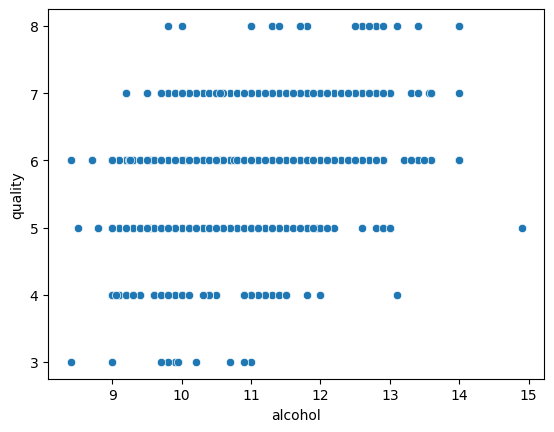

In [314]:
# relation between alcohol and quality
sns.scatterplot(x='alcohol',y='quality',data=df)

not showing any clear trend between them.

<Axes: xlabel='sulphates', ylabel='quality'>

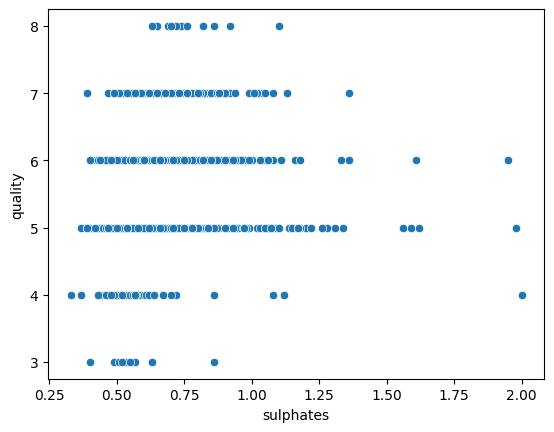

In [315]:
# relation between sulphates and quality.
sns.scatterplot(x='sulphates',y='quality',data=df)

Conclusion:
All the graphs above is not showing any clear trend between independent variable and target variable. which means either no relation or weak correlation between them.
we will check it later by using Correlation coefficient method.

Multivariate Analysis

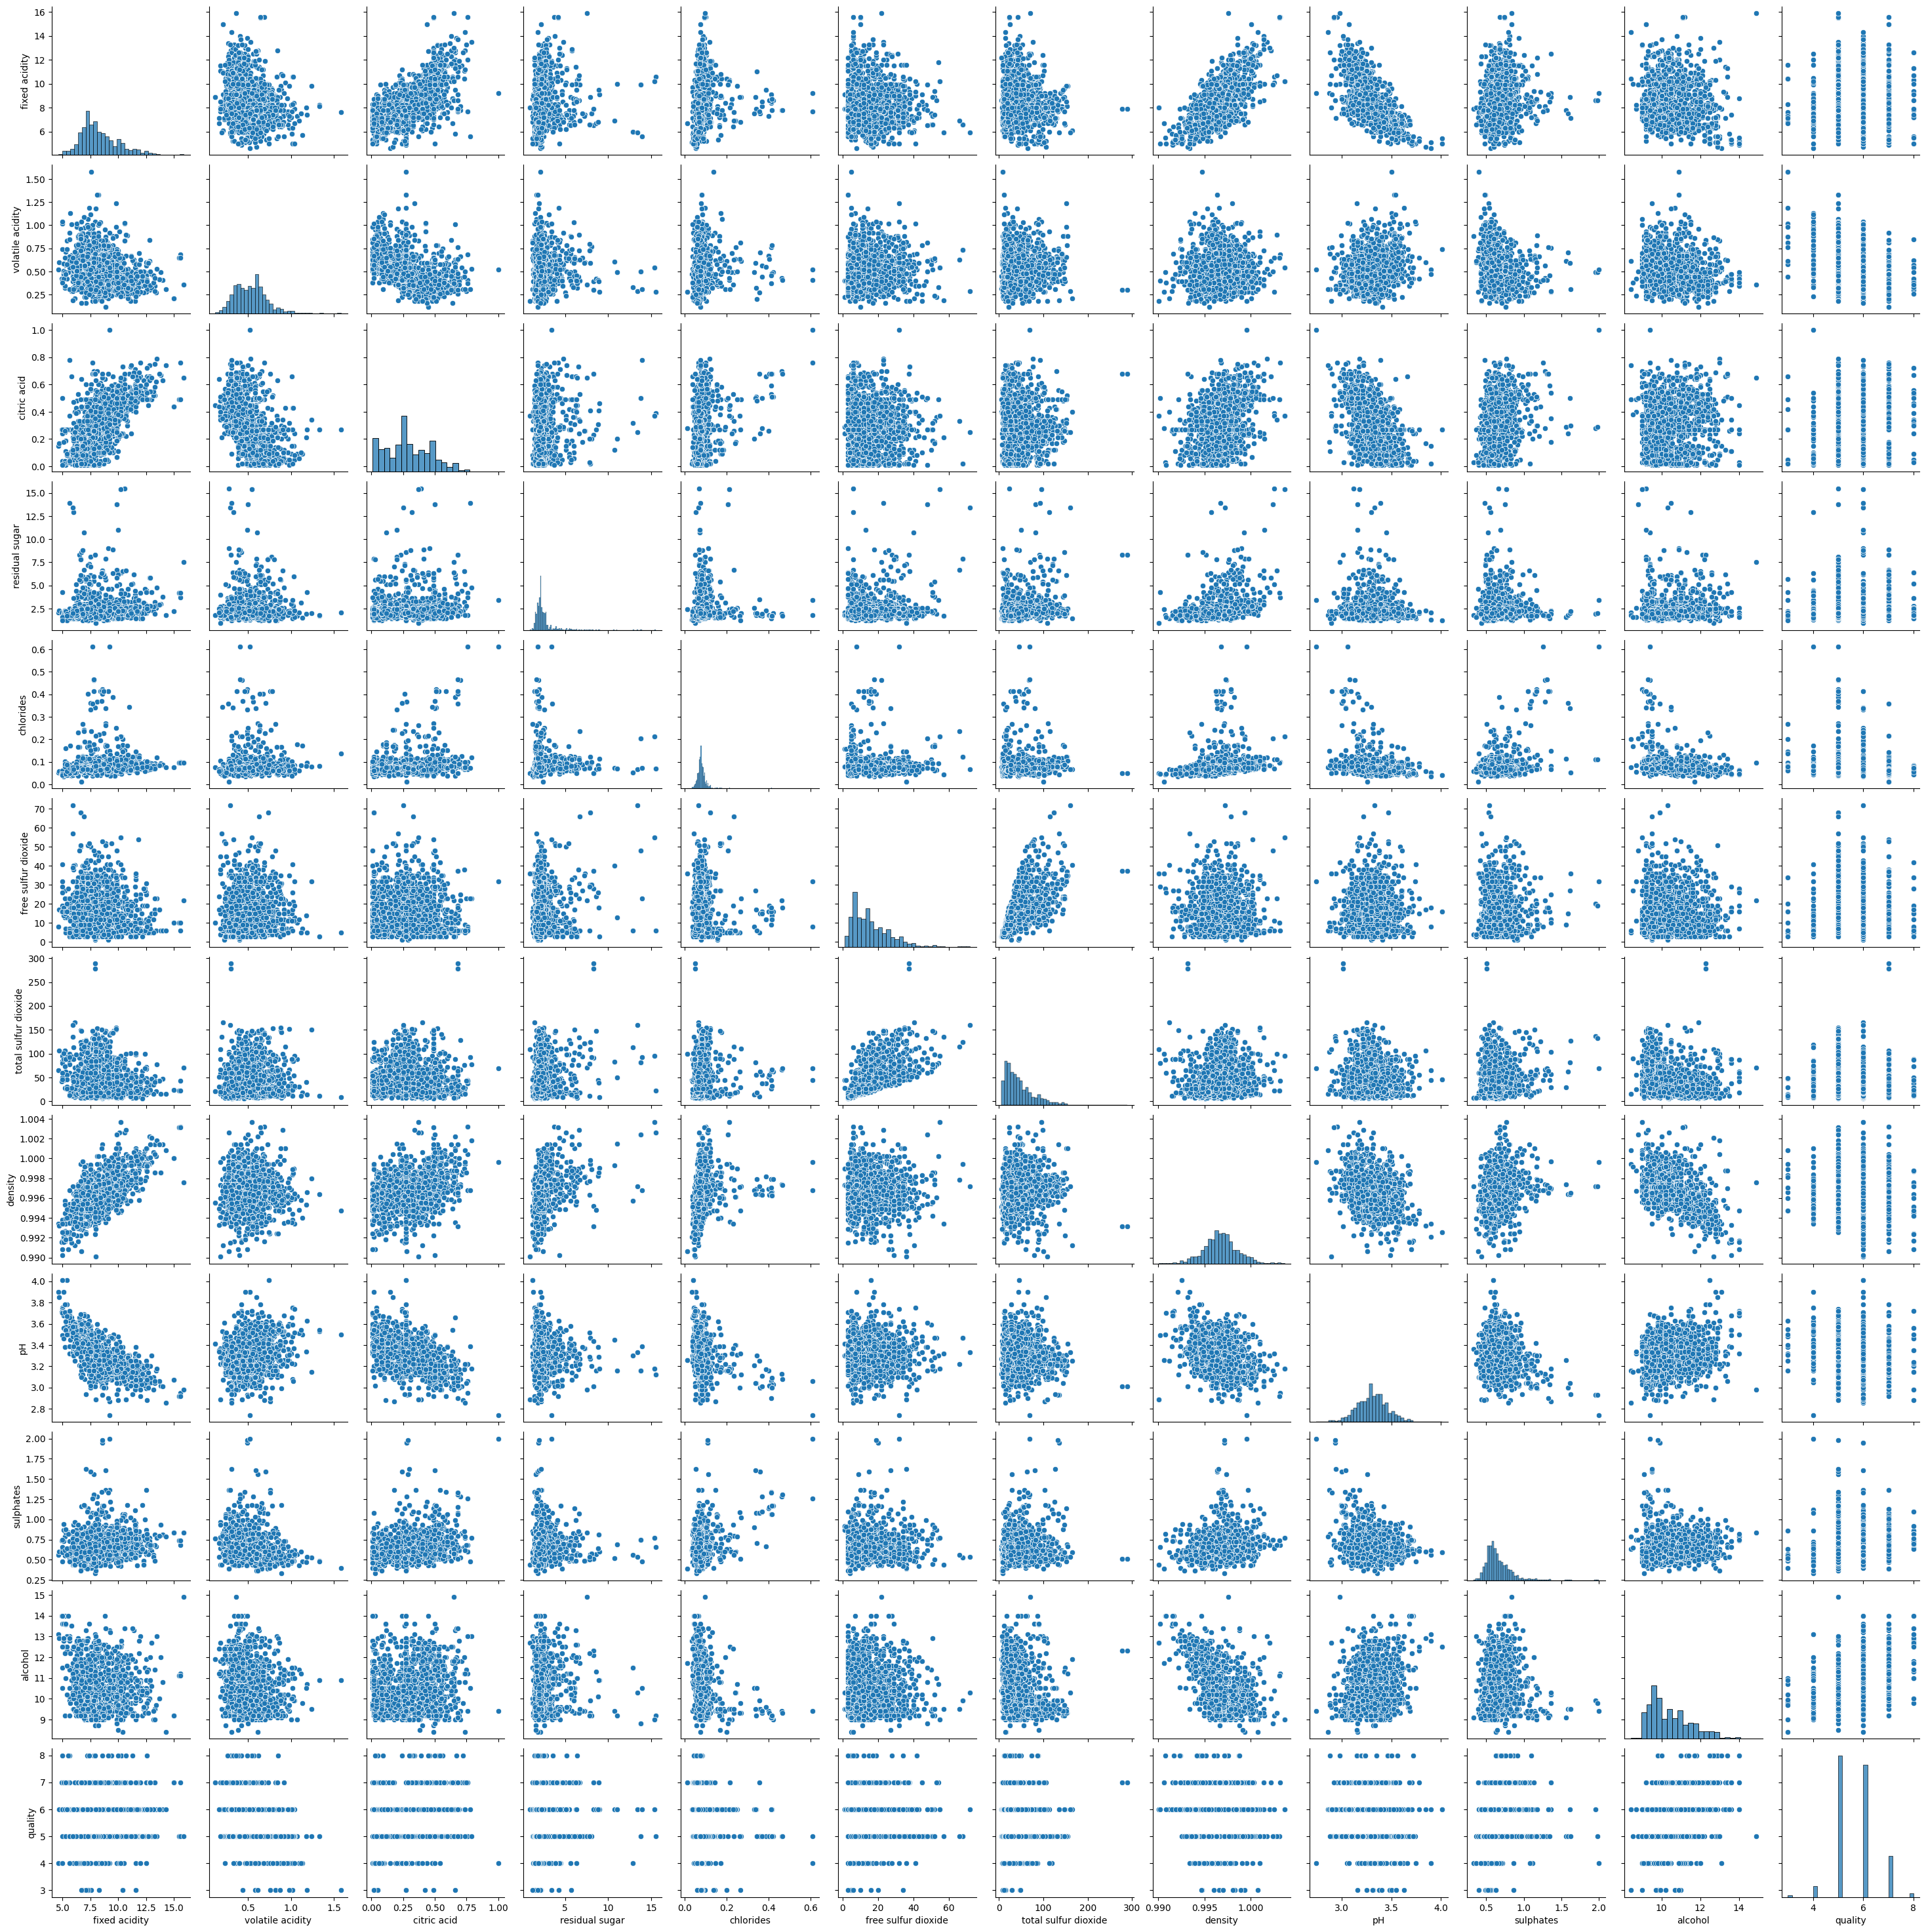

In [316]:
# using pairplot
sns.pairplot(df)
plt.show()

Here we can see distribution of the each feature, relation between one independent variable to another independent variable or target variable.
1) fixed acidity has positive relation with density and citric acid but has negative relation with pH.
2) alcohol has negative relation with density.
3) total sulfur dioxide has positive correlation with free sulfur dioxide 

# Correlation

In [317]:
# Correlation coefficient 
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.642707,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.491586,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.642707,-0.491586,1.000000,0.130984,0.213140,-0.073963,-0.016469,0.345757,-0.477153,0.304037,0.134029,0.213425
residual sugar,0.114777,0.001918,0.130984,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.213140,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.073963,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,-0.016469,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.345757,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.477153,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.304037,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


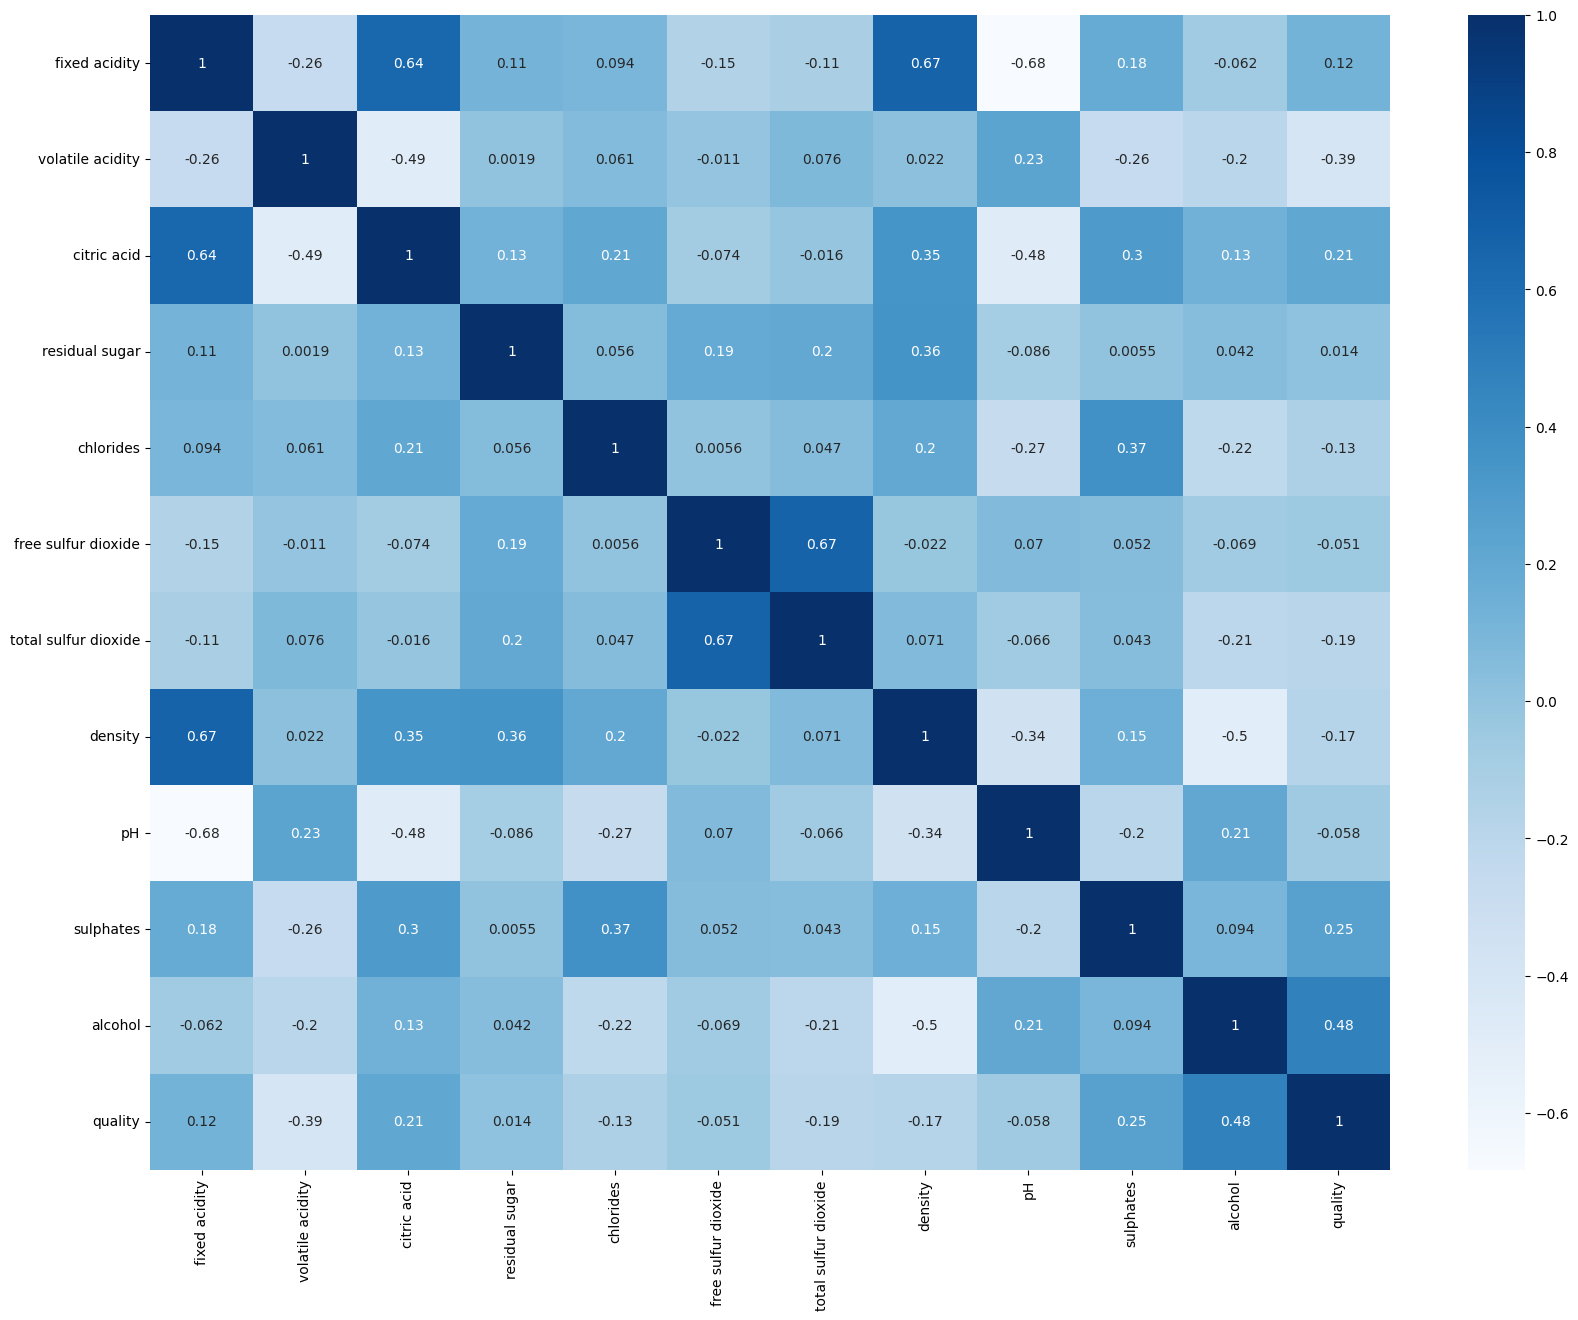

In [318]:
# Visualizing correlation coefficient using Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

Conclusion:
1) pH, density, total sulfur dioxide, free sulfur dioxide, chloride an volatile acidity have weak negative correlation with quality.
2) free sulfur dioxide has strong positive correlation with total sulfur dioxide.
3) some other independent features also have moderate/strong positive or negative correlatoin with each other like pH with density, density with fixed acidity. which indicates the presence of multicolinearity in the data.

# Skewness

In [319]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.338008
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [320]:
# Creating a copy of data set
df1=df.copy()
df1.shape

(1599, 12)

Removing skewness from copied data

In [321]:
# Removing Skewness using np.cbrt method
df1['fixed acidity']=np.cbrt(df1['fixed acidity'])
df1['volatile acidity']=np.cbrt(df1['volatile acidity'])
df1['residual sugar']=np.cbrt(df1['residual sugar'])
df1['chlorides']=np.cbrt(df1['chlorides'])
df1['free sulfur dioxide']=np.cbrt(df1['free sulfur dioxide'])
df1['total sulfur dioxide']=np.cbrt(df1['total sulfur dioxide'])
df1['sulphates']=np.cbrt(df1['sulphates'])
df1['alcohol']=np.cbrt(df1['alcohol'])

In [322]:
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

In [323]:
df1['residual sugar']=np.sqrt(df1['residual sugar'])
df1['chlorides']=np.sqrt(df1['chlorides'])
df1['sulphates']=np.sqrt(df1['sulphates'])
df1['alcohol']=np.sqrt(df1['alcohol'])

In [324]:
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          2.151166
chlorides               2.410058
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.112463
alcohol                 0.693616
quality                 0.217802
dtype: float64

In [325]:
df1['residual sugar']=np.log(df1['residual sugar'])
df1['chlorides']=np.log(df1['chlorides'])
df1['sulphates']=np.log(df1['sulphates'])
df1['alcohol']=np.log(df1['alcohol'])

In [326]:
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

In [327]:
from scipy.stats import boxcox

In [328]:
df1['residual sugar']=boxcox(df1['residual sugar'],lmbda=-1)
df1['chlorides']=boxcox(df1['chlorides'],lmbda=-1)
df1['sulphates']=boxcox(df1['sulphates'],lmbda=-1)
df1['alcohol']=boxcox(df1['alcohol'],lmbda=-1)

In [329]:
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar         -2.597906
chlorides                    NaN
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates                    NaN
alcohol                 0.508937
quality                 0.217802
dtype: float64

Chlorides and sulphates becomes NaN when using boxcox method on copy data. So we are only going to use np.cbrt,np.sqrt,np.log method on original data.  

Removing Skewness from original data

In [330]:
# Removing Skewness using np.cbrt method
df['fixed acidity']=np.cbrt(df['fixed acidity'])
df['volatile acidity']=np.cbrt(df['volatile acidity'])
df['residual sugar']=np.cbrt(df['residual sugar'])
df['chlorides']=np.cbrt(df['chlorides'])
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [331]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

In [332]:
# Using squareroot method
df['residual sugar']=np.sqrt(df['residual sugar'])
df['chlorides']=np.sqrt(df['chlorides'])
df['sulphates']=np.sqrt(df['sulphates'])
df['alcohol']=np.sqrt(df['alcohol'])

In [333]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          2.151166
chlorides               2.410058
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.112463
alcohol                 0.693616
quality                 0.217802
dtype: float64

In [334]:
# Using Log tranform
df['residual sugar']=np.log(df['residual sugar'])
df['chlorides']=np.log(df['chlorides'])
df['sulphates']=np.log(df['sulphates'])
df['alcohol']=np.log(df['alcohol'])

In [335]:
df['alcohol']=boxcox(df['alcohol'],lmbda=-1)

In [336]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.338008
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.508937
quality                 0.217802
dtype: float64

<Axes: xlabel='alcohol', ylabel='Density'>

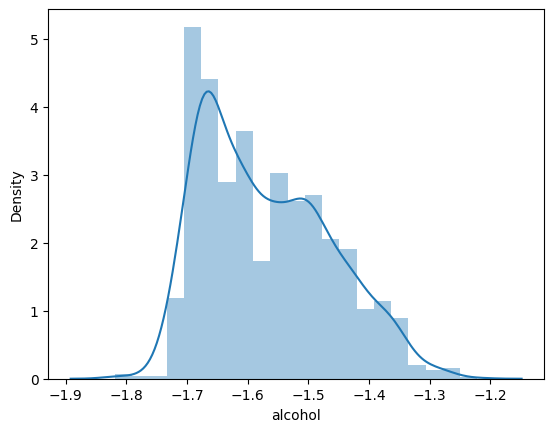

In [337]:
sns.distplot(df['alcohol'])

# Outliers

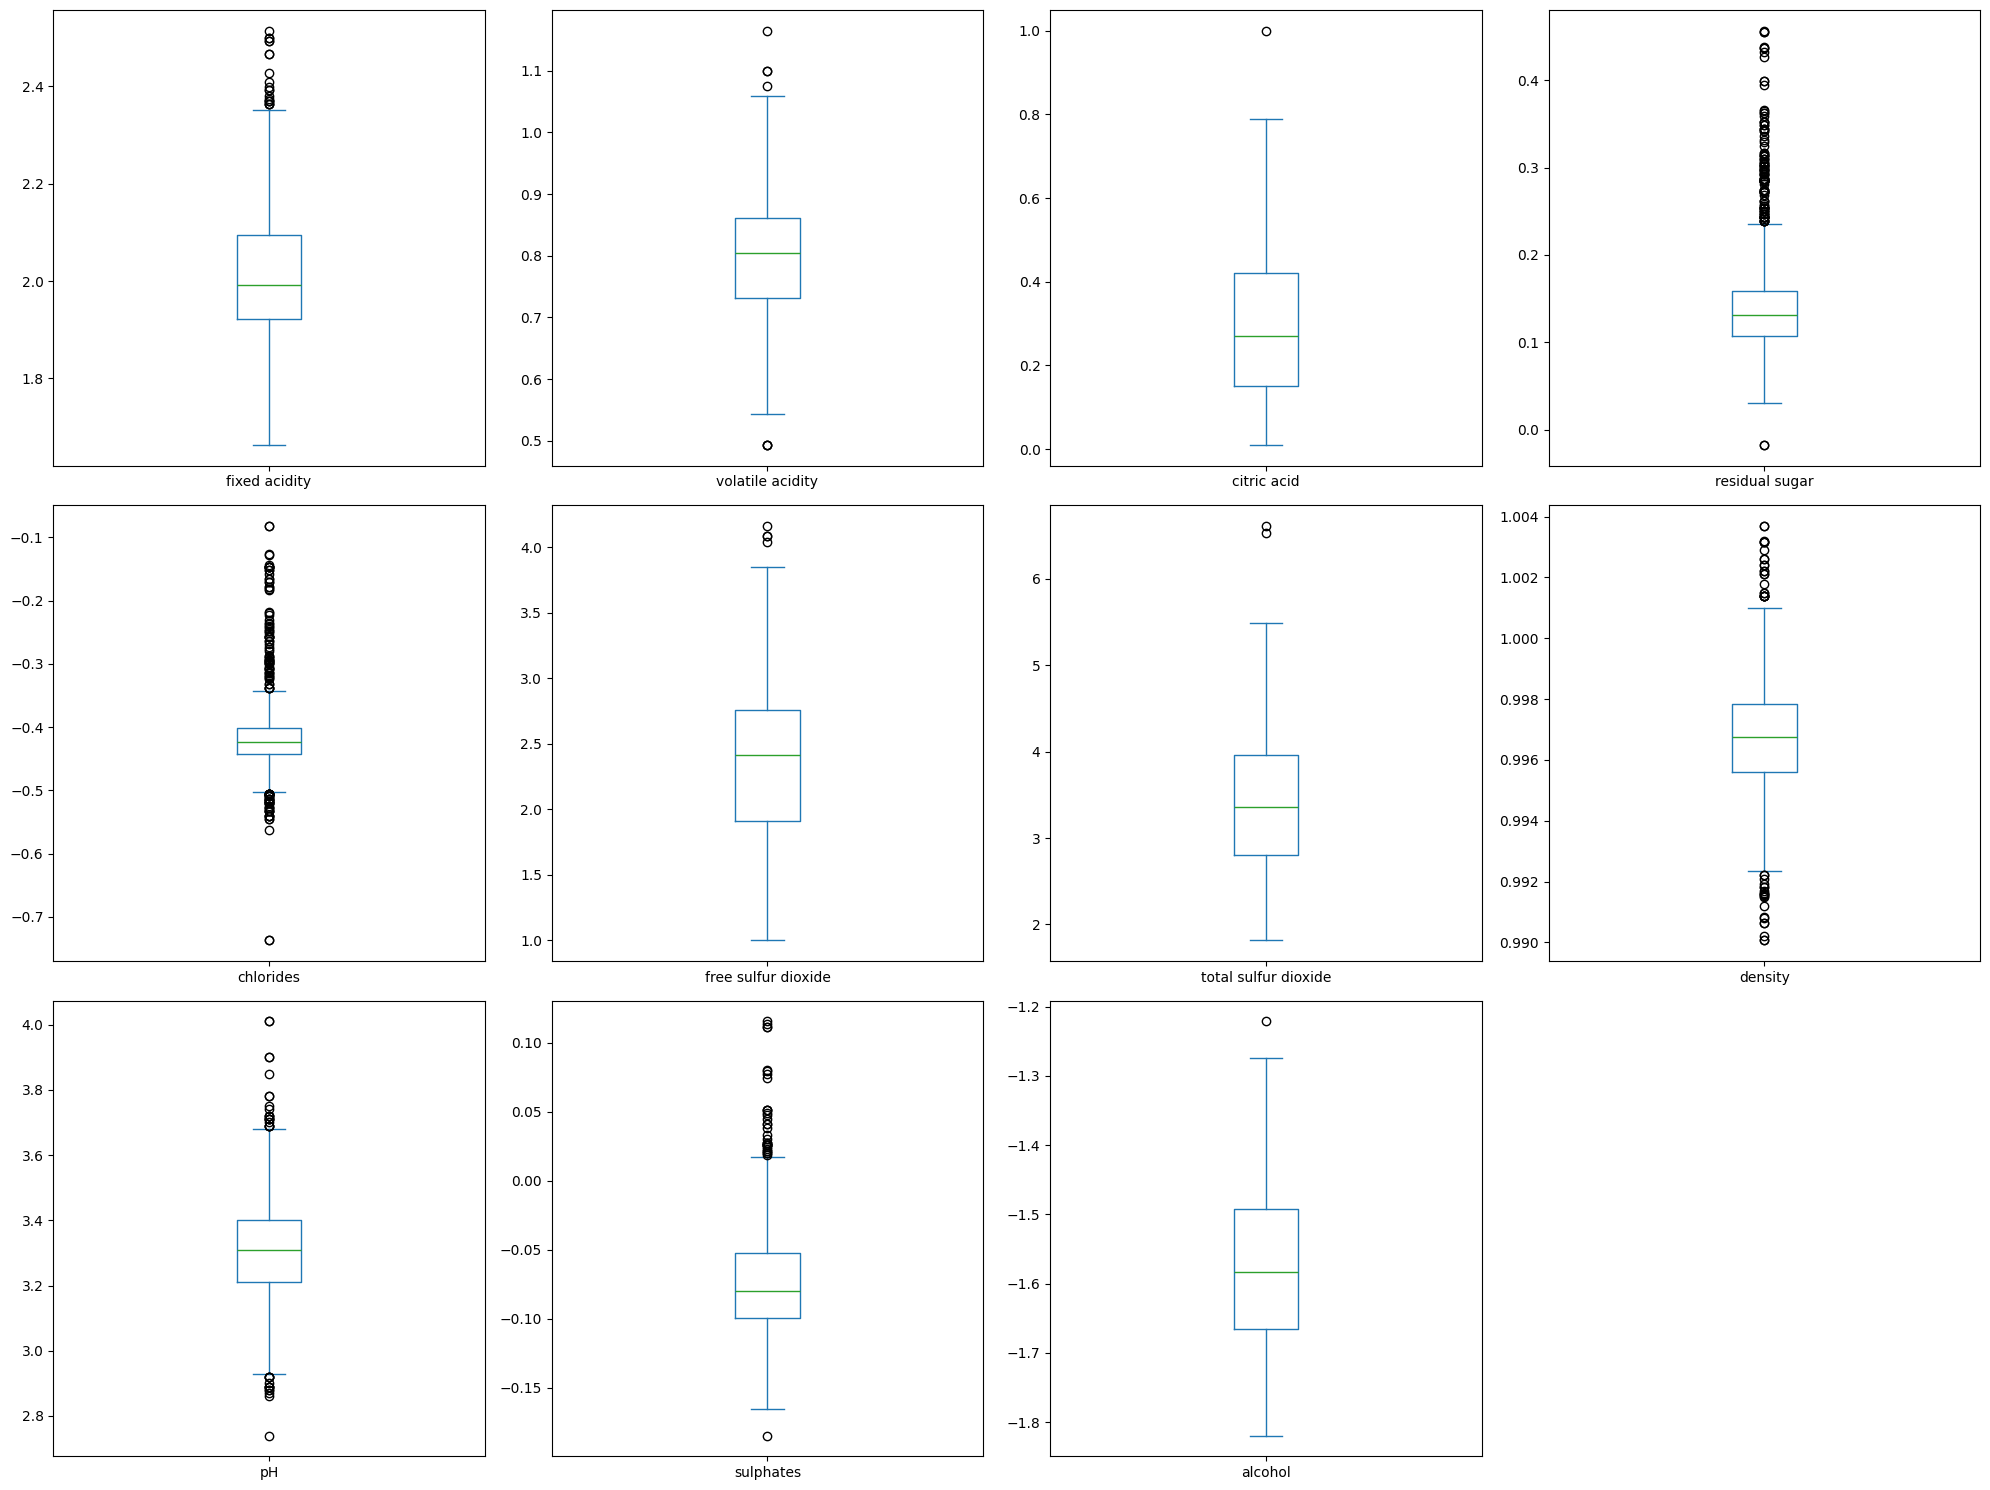

In [338]:
# Plotting Boxplot to see outliers
df.iloc[:,0:-1].plot(kind='box',subplots=True,layout=(3,4),figsize=(20,15))
plt.tight_layout()
plt.show()

Conclusion:- High Outliers are present in fixed acidity, residual sugar, chloride, density, pH and sulphates features.

Removing Outliers

In [339]:
# Importing Library
from scipy.stats import zscore

In [340]:
z=pd.DataFrame(np.abs(zscore(df.iloc[:,0:-1])),columns=df.columns[0:-1])
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.502833,0.980285,0.126315,0.583150,0.218763,0.323303,0.217554,0.558274,1.288643,0.602062,1.019512
1,0.249061,1.745223,0.126315,0.294627,0.558443,0.983836,0.813317,0.028261,0.719933,0.266658,0.558288
2,0.249061,1.248486,1.430580,0.048478,0.365302,0.129002,0.459903,0.134264,0.331177,0.064774,0.558288
3,1.620799,1.559625,1.505738,0.583150,0.259254,0.325192,0.629351,0.664277,0.979104,0.445052,0.558288
4,0.502833,0.980285,0.126315,0.583150,0.218763,0.323303,0.217554,0.558274,1.288643,0.602062,1.019512
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.323829,0.496940,1.204709,0.439605,0.298111,1.452110,0.147087,0.978765,0.899886,0.445052,0.169372
1595,1.545413,0.234881,1.091774,0.172877,0.841175,1.856199,0.370437,0.862162,1.353436,0.764320,0.812430
1596,1.251559,0.013548,0.922371,0.048478,0.218763,1.260746,0.008628,0.533554,0.705508,0.705056,0.636378
1597,1.545413,0.720613,0.978839,0.439605,0.259254,1.452110,0.147087,0.676657,1.677400,0.459825,0.131090


In [341]:
#Threshold = 3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
         91,   92,   95,  106,  106,  126,  127,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  226,  226,  240,  243,  244,
        258,  258,  274,  281,  291,  324,  325,  339,  396,  396,  400,
        400,  442,  442,  451,  480,  480,  494,  544,  554,  554,  555,
        555,  557,  557,  566,  567,  568,  595,  608,  614,  639,  649,
        652,  652,  652,  666,  672,  692,  695,  723,  730,  754,  776,
        777,  836,  836,  837,  837,  889,  911,  917,  923,  948,  949,
        950, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1165, 1186, 1235, 1244, 1244, 1260, 1269, 1270,
       1299, 1300, 1316, 1319, 1319, 1321, 1370, 1372, 1374, 1434, 1434,
       1435, 1435, 1474, 1474, 1476, 1476, 1558, 1558, 1570, 1574, 1589],
      dtype=int64), array([ 9,  4,  9,  4,  3,  4,  8,  4,  9,  4,  9,  9,  9,  8,  4,  9,  1,
        1,  4,  2,  4,  8, 

In [342]:
z.iloc[13,9]

3.981920488509147

In [343]:
z.iloc[1589,3]

3.369116947181565

In [344]:
# Removing Outliers
dfn=df[(z<3).all(axis=1)]
dfn.shape

(1497, 12)

In [345]:
print('Dimension before removing outliers:- ',df.shape)
print('Dimension after removing outliers:- ', dfn.shape)

Dimension before removing outliers:-  (1599, 12)
Dimension after removing outliers:-  (1497, 12)


Dividing target column classe into two classes, 7 or greater tha 7 into 'good/1' and less than 7 into 'not good/0'.

In [346]:
#checkinhg no. of rows that have quality score 7 or greater than 7 
g_e_7=dfn[dfn['quality']>=7].shape[0]
g_e_7

202

In [347]:
# Checking no. of rows that have quality score less than 7
l_7=dfn[dfn['quality']<7].shape[0]
l_7

1295

Quality score 7 or greater than seven has 202 rows and less than 7 has 1295 rows. It infers the occurence of class imbalance problem. which we will rectify after seperating the classes 

In [348]:
dfn['quality']=dfn['quality'].replace(np.where(dfn['quality']<7),0)
dfn['quality']=dfn['quality'].replace(np.where(dfn['quality']>=7),1)
dfn['quality'].value_counts()

quality
0    1295
1     202
Name: count, dtype: int64

quality scores are divided >=7 into 1(which means good) ans <7 into 0(which means "not good")

Seperating the data into input and output variables

In [349]:
x=dfn.iloc[:,0:-1]
y=dfn.iloc[:,-1]

In [350]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.887904,0.270976,0.106976,-0.429504,2.223980,3.239612,0.99780,3.51,-0.096636,-1.677723
1,1.983192,0.958284,0.270976,0.159252,-0.387131,2.924018,4.061548,0.99680,3.20,-0.064277,-1.628832
2,1.983192,0.912581,0.040000,0.138818,-0.397661,2.466212,3.779763,0.99700,3.26,-0.071797,-1.628832
3,2.237378,0.654213,0.560000,0.106976,-0.431711,2.571282,3.914868,0.99800,3.16,-0.090788,-1.628832
4,1.948695,0.887904,0.270976,0.106976,-0.429504,2.223980,3.239612,0.99780,3.51,-0.096636,-1.677723
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.843433,0.080000,0.115525,-0.401324,3.174802,3.530348,0.99490,3.45,-0.090788,-1.551698
1595,1.806969,0.819321,0.100000,0.131410,-0.463437,3.391211,3.708430,0.99512,3.52,-0.045739,-1.483532
1596,1.846915,0.798957,0.130000,0.138818,-0.429504,3.072317,3.419952,0.99574,3.42,-0.047947,-1.502194
1597,1.806969,0.864012,0.120000,0.115525,-0.431711,3.174802,3.530348,0.99547,3.57,-0.057082,-1.583548


In [351]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1497, dtype: int64

# Scaling Feature Data

In [352]:
# Importing standard scaler
from sklearn.preprocessing import StandardScaler

In [353]:
ss=StandardScaler()

In [354]:
xn=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
xn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.516905,1.004285,-0.094733,-0.629012,-0.183318,-0.303449,-0.184466,0.616980,1.354860,-0.609579,-1.052224
1,-0.255075,1.790795,-0.094733,0.435650,0.911269,1.029784,0.874283,0.048956,-0.813019,0.361211,-0.579582
2,-0.255075,1.280050,-1.419731,0.019495,0.639257,0.157885,0.511311,0.162561,-0.393429,0.135606,-0.579582
3,1.674151,-1.607253,1.563263,-0.629012,-0.240345,0.357992,0.685342,0.730585,-1.092745,-0.434121,-0.579582
4,-0.516905,1.004285,-0.094733,-0.629012,-0.183318,-0.303449,-0.184466,0.616980,1.354860,-0.609579,-1.052224
...,...,...,...,...,...,...,...,...,...,...,...
1492,-1.363966,0.507310,-1.190270,-0.454905,0.544628,1.507407,0.190036,-1.030291,0.935270,-0.434121,0.166090
1493,-1.592584,0.237860,-1.075539,-0.131389,-1.059900,1.919562,0.419426,-0.905326,1.424791,0.917345,0.825067
1494,-1.289402,0.010285,-0.903443,0.019495,-0.183318,1.312222,0.047833,-0.553151,0.725476,0.851118,0.644657
1495,-1.592584,0.737290,-0.960809,-0.454905,-0.240345,1.507407,0.190036,-0.706517,1.774449,0.577074,-0.141809


# MultiColinearity

In [355]:
# Importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [356]:
def vif(data):
    df=pd.DataFrame()
    df['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    df['Columns']=data.columns
    return df

In [357]:
# Checking Multicolinearity
vif(xn)

,VIF,Columns
0,8.106651,fixed acidity
1,1.692614,volatile acidity
2,2.491680,citric acid
3,1.785658,residual sugar
4,1.253850,chlorides
5,2.560668,free sulfur dioxide
6,2.804652,total sulfur dioxide
7,6.956871,density
8,3.360257,pH
9,1.359795,sulphates


No Multicolinearity present in the data

# Oversampling

In [358]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [359]:
# Oversampling data to remove class imbalance
sm=SMOTE()
x1,y1=sm.fit_resample(xn,y)

In [360]:
# Checking class values
y1.value_counts()

quality
0    1295
1    1295
Name: count, dtype: int64

# Modeling

In [361]:
# Import Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

Finding Best Random State

In [362]:
def best_random_state(x,y):
    best_accu=0
    r_s=0
    for i in range(1,300):
        x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.30,random_state=i)
        lr=LogisticRegression()
        lr.fit(x_tr,y_tr)
        pred=lr.predict(x_te)
        accu=accuracy_score(y_te,pred)
        if accu>best_accu:
            best_accu=+accu
            r_s=+i
    print('Best Accuracy {} at {} random state'.format(best_accu,r_s))

In [363]:
best_random_state(x1,y1)

Best Accuracy 0.8661518661518661 at 83 random state


Splitting train test data

In [364]:
#Seperating train test data
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=83)

In [365]:
x_train.shape

(1813, 11)

In [366]:
y_train.shape

(1813,)

In [367]:
x_test.shape

(777, 11)

In [368]:
y_test.shape

(777,)

# Finding Best Model

In [369]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
acc_gnb=accuracy_score(y_test,pred_gnb)
print(gnb)
print(acc_gnb)
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

GaussianNB()
0.8416988416988417
[[327  69]
 [ 54 327]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       396
           1       0.83      0.86      0.84       381

    accuracy                           0.84       777
   macro avg       0.84      0.84      0.84       777
weighted avg       0.84      0.84      0.84       777



In [370]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc=accuracy_score(y_test,pred_svc)
print(svc)
print(acc_svc)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

SVC()
0.9099099099099099
[[353  43]
 [ 27 354]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       396
           1       0.89      0.93      0.91       381

    accuracy                           0.91       777
   macro avg       0.91      0.91      0.91       777
weighted avg       0.91      0.91      0.91       777



In [371]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
acc_dtc=accuracy_score(y_test,pred_dtc)
print(dtc)
print(acc_dtc)
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

DecisionTreeClassifier()
0.9073359073359073
[[353  43]
 [ 29 352]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       396
           1       0.89      0.92      0.91       381

    accuracy                           0.91       777
   macro avg       0.91      0.91      0.91       777
weighted avg       0.91      0.91      0.91       777



In [372]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,pred_knn)
print(knn)
print(acc_knn)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

KNeighborsClassifier()
0.8957528957528957
[[316  80]
 [  1 380]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       396
           1       0.83      1.00      0.90       381

    accuracy                           0.90       777
   macro avg       0.91      0.90      0.90       777
weighted avg       0.91      0.90      0.89       777



In [373]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr=accuracy_score(y_test,pred_lr)
print(lr)
print(acc_lr)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

LogisticRegression()
0.8661518661518661
[[334  62]
 [ 42 339]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       396
           1       0.85      0.89      0.87       381

    accuracy                           0.87       777
   macro avg       0.87      0.87      0.87       777
weighted avg       0.87      0.87      0.87       777



In [374]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
acc_rfc=accuracy_score(y_test,pred_rfc)
print(rfc)
print(acc_rfc)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

RandomForestClassifier()
0.9716859716859717
[[380  16]
 [  6 375]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       396
           1       0.96      0.98      0.97       381

    accuracy                           0.97       777
   macro avg       0.97      0.97      0.97       777
weighted avg       0.97      0.97      0.97       777



In [375]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
acc_etc=accuracy_score(y_test,pred_etc)
print(etc)
print(acc_etc)
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

ExtraTreesClassifier()
0.9755469755469756
[[382  14]
 [  5 376]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       396
           1       0.96      0.99      0.98       381

    accuracy                           0.98       777
   macro avg       0.98      0.98      0.98       777
weighted avg       0.98      0.98      0.98       777



In [376]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
acc_abc=accuracy_score(y_test,pred_abc)
print(abc)
print(acc_abc)
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

AdaBoostClassifier()
0.8854568854568855
[[349  47]
 [ 42 339]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       396
           1       0.88      0.89      0.88       381

    accuracy                           0.89       777
   macro avg       0.89      0.89      0.89       777
weighted avg       0.89      0.89      0.89       777



In [377]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc=accuracy_score(y_test,pred_gbc)
print(gbc)
print(acc_gbc)
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

GradientBoostingClassifier()
0.9279279279279279
[[363  33]
 [ 23 358]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       396
           1       0.92      0.94      0.93       381

    accuracy                           0.93       777
   macro avg       0.93      0.93      0.93       777
weighted avg       0.93      0.93      0.93       777



ExtraTreesClassifier Giving best accuracy of 97.55.

# Cross Val Score

In [378]:
score_gnb=cross_val_score(gnb,x1,y1)
print(score_gnb)
print(score_gnb.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(gnb),acc_gnb*100-score_gnb.mean()*100)

[0.83976834 0.7027027  0.83011583 0.73166023 0.8011583 ]
0.7810810810810811
difference between accuracy score and cross val score for GaussianNB() is:-  6.061776061776058


In [379]:
score_svc=cross_val_score(svc,x1,y1)
print(score_svc)
print(score_svc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(svc),acc_svc*100-score_svc.mean()*100)

[0.93243243 0.80888031 0.87837838 0.81467181 0.85521236]
0.8579150579150578
difference between accuracy score and cross val score for SVC() is:-  5.19948519948521


In [380]:
score_dtc=cross_val_score(dtc,x1,y1)
print(score_dtc)
print(score_dtc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(dtc),acc_svc*100-score_dtc.mean()*100)

[0.8996139  0.87644788 0.90540541 0.80694981 0.85328185]
0.8683397683397682
difference between accuracy score and cross val score for DecisionTreeClassifier() is:-  4.157014157014174


In [381]:
score_knn=cross_val_score(knn,x1,y1)
print(score_knn)
print(score_knn.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(knn),acc_knn*100-score_knn.mean()*100)

[0.91505792 0.80501931 0.87644788 0.81660232 0.81467181]
0.8455598455598455
difference between accuracy score and cross val score for KNeighborsClassifier() is:-  5.019305019305023


In [382]:
score_lr=cross_val_score(lr,x1,y1)
print(score_lr)
print(score_lr.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(lr),acc_lr*100-score_lr.mean()*100)

[0.88996139 0.78185328 0.84362934 0.71621622 0.79343629]
0.805019305019305
difference between accuracy score and cross val score for LogisticRegression() is:-  6.113256113256114


In [384]:
score_rfc=cross_val_score(rfc,x1,y1)
print(score_rfc)
print(score_rfc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(rfc),acc_rfc*100-score_rfc.mean()*100)

[0.97104247 0.88223938 0.94015444 0.87258687 0.90926641]
0.915057915057915
difference between accuracy score and cross val score for RandomForestClassifier() is:-  5.662805662805667


In [385]:
score_etc=cross_val_score(etc,x1,y1)
print(score_etc)
print(score_etc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(etc),acc_etc*100-score_etc.mean()*100)

[0.98262548 0.88610039 0.95752896 0.9034749  0.95945946]
0.9378378378378379
difference between accuracy score and cross val score for ExtraTreesClassifier() is:-  3.770913770913765


In [386]:
score_abc=cross_val_score(abc,x1,y1)
print(score_abc)
print(score_abc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(abc),acc_abc*100-score_abc.mean()*100)

[0.89189189 0.82818533 0.85714286 0.77027027 0.83011583]
0.8355212355212356
difference between accuracy score and cross val score for AdaBoostClassifier() is:-  4.993564993564988


In [387]:
score_gbc=cross_val_score(gbc,x1,y1)
print(score_gbc)
print(score_gbc.mean())
print('difference between accuracy score and cross val score for {} is:- '.format(gbc),acc_gbc*100-score_gbc.mean()*100)

[0.91312741 0.83783784 0.8957529  0.81081081 0.87258687]
0.8660231660231661
difference between accuracy score and cross val score for GradientBoostingClassifier() is:-  6.19047619047619


ExtraTrees Classifier has less differnce between accuracy score and cross_val score:-- 3.77. Hence Considiring it as best performing Model

# Hyper parameter Tuning

In [388]:
# Importing Grid search cv
from sklearn.model_selection import GridSearchCV

In [393]:
params={'n_estimators':[100,150,200,250],
       'criterion':['gini','entropy','log_loss'],
       'max_features':['sqrt','log2'],
       'random_state':range(1,40),
       }

In [394]:
gcv=GridSearchCV(etc,params,cv=5)

In [395]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': range(1, 40)})

In [396]:
gcv.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 150,
 'random_state': 39}

In [400]:
ModelETC=ExtraTreesClassifier(criterion='entropy',max_features='log2',n_estimators=100,random_state=15)

In [401]:
ModelETC.fit(x_train,y_train)
predModel=ModelETC.predict(x_test)
accuracy_Model=accuracy_score(y_test,predModel)
print(accuracy_Model)

0.9755469755469756


In [402]:
ModelETC=ExtraTreesClassifier(criterion='gini',max_features='sqrt',n_estimators=150,random_state=39)

In [403]:
ModelETC.fit(x_train,y_train)
predModel=ModelETC.predict(x_test)
accuracy_Model=accuracy_score(y_test,predModel)
print(accuracy_Model)

0.9794079794079794


# Plotting AUC ROC for best model

In [404]:
from sklearn import metrics

Text(0.5, 1.0, 'AUC ROC CURVE')

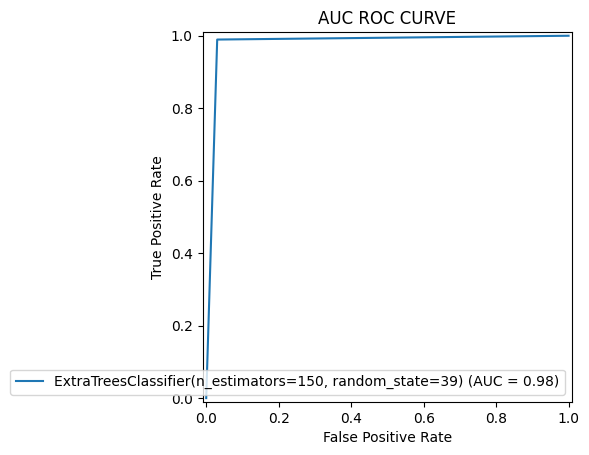

In [406]:
# plotting graph
fpr,tpr,thresholds=metrics.roc_curve(y_test,predModel)
roc_auc=metrics.auc(fpr,tpr)
graph=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=ModelETC)
graph.plot()
plt.title('AUC ROC CURVE')

# Saving Best Model

In [407]:
# Import pickle
import pickle

In [408]:
filename='Red_wine_quality.pkl'

In [409]:
pickle.dump(ModelETC,open(filename,'wb'))